# Classification: what we are going to cover.

1) architecture of nn classification model
2) 

# create data for classification:

In [2]:
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from torch import nn

In [3]:
#create 1000 samples

n_samples = 1000
#X is a matrix
#y is a label (0 or 1 for example)
X, y = make_circles(n_samples, noise=0.03)

print(f"first 5 samples of X {X[:5]}")
print(f"first 5 samples of y {y[:5]}")

first 5 samples of X [[ 1.00784591 -0.19417602]
 [-0.18458354  0.99226941]
 [-1.01136725  0.04244703]
 [-0.2799778   0.96698188]
 [-0.73117735  0.40334356]]
first 5 samples of y [0 0 0 0 1]


In [4]:
circles = pd.DataFrame({"X1": X[:, 0],
              "X2": X[:, 1],
              "label": y})
circles.head(11)

,X1,X2,label
0,1.007846,-0.194176,0
1,-0.184584,0.992269,0
2,-1.011367,0.042447,0
3,-0.279978,0.966982,0
4,-0.731177,0.403344,1
5,-0.595411,-0.500008,1
6,0.704027,0.497587,1
7,0.906670,0.411334,0
8,-0.586578,0.565053,1
9,-0.982494,0.020242,0


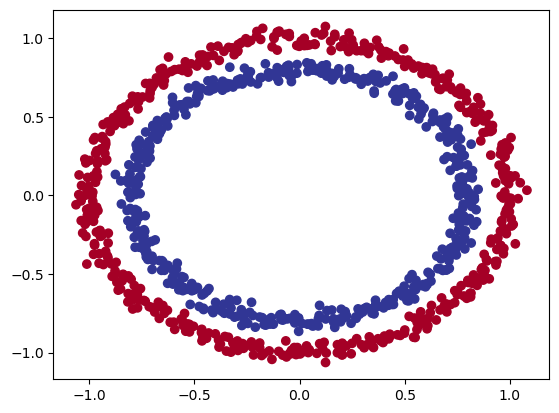

In [5]:
plt.scatter(x = X[:, 0],
            y = X[:, 1],
            c = y,
            cmap = plt.cm.RdYlBu)

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
X

array([[ 1.00784591, -0.19417602],
       [-0.18458354,  0.99226941],
       [-1.01136725,  0.04244703],
       ...,
       [ 0.3069748 , -0.96880434],
       [-0.13456672, -0.77785659],
       [ 0.69755452,  0.69177786]])

In [8]:
#turn the data into tensors:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [9]:
X[:5], y[: 5]

(tensor([[ 1.0078, -0.1942],
         [-0.1846,  0.9923],
         [-1.0114,  0.0424],
         [-0.2800,  0.9670],
         [-0.7312,  0.4033]]),
 tensor([0., 0., 0., 0., 1.]))

In [10]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size= 0.2)

In [12]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [13]:
X_train.shape
#because it is of shape 2 we will have in_features in the model = 2 

torch.Size([800, 2])

Let's create a model class that:

1) Subclasses nn.Module (almost all PyTorch models are subclasses of nn.Module).

2) Creates 2 nn.Linear layers in the constructor capable of handling the input and output shapes of X and y.

3) Defines a forward() method containing the forward pass computation of the model.

4) Instantiates the model class and sends it to the target device.

In [14]:
class circlemodel0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features= 2, out_features = 5)
        self.layer2 = nn.Linear(in_features= 5, out_features= 1)
        
        
    def forward(self, x):
        return self.layer2(self.layer1(x))
    
    
model1 = circlemodel0()
model1

circlemodel0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [15]:
next(model1.parameters())

Parameter containing:
tensor([[-0.5190, -0.2708],
        [ 0.0303, -0.0809],
        [ 0.3229,  0.2357],
        [-0.0321, -0.4359],
        [ 0.6257,  0.0378]], requires_grad=True)

REPLICATE THE MODEL USING NN.SEQUENTIAL (ITS EASIER AND SHORTER):

In [16]:
model1 = nn.Sequential(
        nn.Linear(in_features= 2, out_features= 5),
        nn.Linear(in_features= 5, out_features= 1))

model1 

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
model1.state_dict()
#the first out_feaures = 5 so it will give us 5 parameters for the first bias 
#the first weight (weight0) has 10 parameters because in_features * out_features = 2*5 = 10


OrderedDict([('0.weight',
              tensor([[ 0.3334,  0.2925],
                      [-0.2918, -0.2917],
                      [ 0.5269, -0.2410],
                      [-0.6979, -0.3773],
                      [ 0.3915,  0.1507]])),
             ('0.bias', tensor([-0.1588, -0.3615,  0.5067,  0.6741, -0.5465])),
             ('1.weight',
              tensor([[-0.1599,  0.1605, -0.1534,  0.3808, -0.1061]])),
             ('1.bias', tensor([-0.0985]))])

In [18]:
#make predictions:
untrained_pred = model1(X_test)
print(f"len of untrained_pred {len(untrained_pred)}", f"shape {untrained_pred.shape}")
print(f"len of test sample {len(y_test)}, shape {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_pred[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

len of untrained_pred 200 shape torch.Size([200, 1])
len of test sample 200, shape torch.Size([200])

First 10 predictions:
tensor([[ 0.0012],
        [ 0.3506],
        [ 0.0766],
        [ 0.4160],
        [ 0.4733],
        [ 0.3330],
        [-0.0337],
        [ 0.4508],
        [ 0.4915],
        [-0.1516]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 1., 1., 1., 0., 0., 1., 1., 1., 1.])


In [19]:
X_test[:10], y_test[:10]

(tensor([[ 0.5106, -0.6685],
         [-0.6885,  0.4230],
         [ 0.3726, -0.7055],
         [-0.2949, -0.7678],
         [-0.3548, -0.8973],
         [-0.0166, -1.0125],
         [ 0.5514, -0.5992],
         [-0.7592,  0.1190],
         [-0.4766, -0.7067],
         [ 0.1831,  0.7770]]),
 tensor([1., 1., 1., 1., 0., 0., 1., 1., 1., 1.]))

# Setting a loss function and an optimizer:

In [20]:
loss_function = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params= model1.parameters(), lr = 0.1)

In [21]:
def accuracy_function(y_true, y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()    
    acc = (correct/len(y_true)) *100
    return acc

1) Forward pass - The model goes through all of the training data once, performing its forward() function calculations (model(x_train)).

2) Calculate the loss - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are (loss = loss_fn(y_pred, y_train).

3) Zero gradients - The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step (optimizer.zero_grad()).

4) Perform backpropagation on the loss - Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True).

This is known as backpropagation, hence "backwards" (loss.backward()).

5) Step the optimizer (gradient descent) - Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them (optimizer.step()).

In [22]:
torch.manual_seed(42)
with torch.inference_mode():
    y_logits = model1(X_test)[:5]
y_logits

tensor([[0.0012],
        [0.3506],
        [0.0766],
        [0.4160],
        [0.4733]])

In [23]:
y_test[:5]

tensor([1., 1., 1., 1., 0.])

In [24]:
#use the sigmoid function on our model logits to turn them into predictions probabilities,
#in the binary classification architecture, the output activation is the sigmoid function:

y_preds_probs = torch.sigmoid(y_logits)
print(y_preds_probs)

tensor([[0.5003],
        [0.5868],
        [0.5191],
        [0.6025],
        [0.6162]])


The closer to 0, the more the model thinks the sample belongs to class 0, the closer to 1, the more the model thinks the sample belongs to class 1.

More specificially:

If y_pred_probs >= 0.5, y=1 (class 1)


If y_pred_probs < 0.5, y=0 (class 0)


In [25]:
y_preds = torch.round(y_preds_probs)
y_preds_labels = torch.round(torch.sigmoid(model1(X_test))[:5])
#squeeze to remove any dimension 1 from tensors
print(torch.eq(y_preds.squeeze(), y_preds_labels.squeeze()))


tensor([True, True, True, True, True])


In [26]:
def accuracy_function(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

In [27]:
epochs = 100
for epoch in range(epochs):
    
    model1.train()
    #forward pass:
    y_logits = model1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels
    loss = loss_function(y_logits, y_train) # because the loss function is a 
    #BCEWithLogitsLoss it expects an input logit (y_logits)
    
    acc = accuracy_function(y_true = y_train, 
                           y_pred = y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    model1.eval()
    #always after model.eval(), we use with inference
    with torch.inference_mode():
        test_logits = model1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_function(test_logits, test_pred)
        acc_test = accuracy_function(y_true = y_test,
                                    y_pred = test_pred)
    if epoch %10 ==0: 
        print(f"Epoch: {epoch}, loss: {test_loss}, accuracy: {acc_test}")

Epoch: 0, loss: 0.5572870969772339, accuracy: 49.0
Epoch: 10, loss: 0.5750720500946045, accuracy: 49.0
Epoch: 20, loss: 0.5888174176216125, accuracy: 48.5
Epoch: 30, loss: 0.6000834107398987, accuracy: 48.0
Epoch: 40, loss: 0.6096904277801514, accuracy: 47.5
Epoch: 50, loss: 0.6180062890052795, accuracy: 47.5
Epoch: 60, loss: 0.625298023223877, accuracy: 47.5
Epoch: 70, loss: 0.6317448616027832, accuracy: 48.0
Epoch: 80, loss: 0.637448251247406, accuracy: 48.5
Epoch: 90, loss: 0.6425416469573975, accuracy: 48.5


In [28]:
loss_function

BCEWithLogitsLoss()

In [29]:
#from helper_functions import plot_predictions, plot_decision_boundary
#plt.figure(figsize=(12, 6))
#plt.subplot(1, 2, 1)
#plt.title("Train")
#plot_decision_boundary(model1, X_train, y_train)
#plt.subplot(1, 2, 2)
#plt.title("Test")
#plot_decision_boundary(model1, X_test, y_test)

In [30]:
class circle1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features= 10)
        self.layer2 = nn.Linear(in_features=10, out_features= 10)
        self.layer3 = nn.Linear(in_features=10, out_features= 1)
        
    def forward(self, x):
        return self.layer3(self.layer2(self.layer1(x)))

In [31]:
model2 = circle1()
model2

circle1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [32]:
epoch = 1000
for epoch in range(epochs):
    model2.train()
    y_logit = model2(X_train).squeeze()
    y_pred_train = torch.round(torch.sigmoid(y_logit))
    loss_train = loss_function(y_logit, y_train)
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()
    
    model2.eval()
    with torch.inference_mode():
        y_logit_test = model2(X_test).squeeze()
        y_pred_test = torch.round(torch.sigmoid(y_logit_test))
        loss_test = loss_function(y_logit_test, y_test)
        accuracy_test = accuracy_function(y_true = y_test, y_pred = y_pred_test)
        
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss_train:.5f} |Test loss: {loss_test:.5f} | accuracy {accuracy_test}")

Epoch: 0 | Loss: 0.69350 |Test loss: 0.69467 | accuracy 47.5


we can still see that our model is not learning anything. Logic, because our data are non linear and we are using nn.Linear to build our model.

In [33]:
#build a model with non linear functions:
class circle2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features= 10)
        self.layer2 = nn.Linear(in_features=10, out_features= 10)
        self.layer3 = nn.Linear(in_features=10, out_features= 1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

In [34]:
model3 = circle2()
model3

circle2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [39]:
loss = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params= model3.parameters(), lr = 0.1)

In [40]:
#random seed:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [45]:
epochs = 1000
for epoch in range(epochs):
    model3.train()
    y_logits_train = model3(X_train).squeeze()
    y_label_train_pred = torch.round(torch.sigmoid(y_logits_train))
    
    loss_train = loss(y_logits_train, y_train)
    acc_train = accuracy_function(y_true = y_train , y_pred = y_label_train_pred)
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()
    
    model3.eval()
    with torch.inference_mode():
        y_logit_test = model3(X_test).squeeze()
        y_label_test_pred = torch.round(torch.sigmoid(y_logit_test))
        loss_test = loss(y_logit_test, y_test)
        acc_test = accuracy_function(y_true = y_test, y_pred =y_label_test_pred)
        
        
    if epoch %10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss_train:.5f} |Test loss: {loss_test:.5f} | accuracy {acc_test}")

Epoch: 0 | Loss: 0.12032 |Test loss: 0.12654 | accuracy 99.0
Epoch: 10 | Loss: 0.11555 |Test loss: 0.12274 | accuracy 99.0
Epoch: 20 | Loss: 0.11105 |Test loss: 0.11908 | accuracy 99.0
Epoch: 30 | Loss: 0.10687 |Test loss: 0.11565 | accuracy 99.0
Epoch: 40 | Loss: 0.10294 |Test loss: 0.11237 | accuracy 99.0
Epoch: 50 | Loss: 0.09926 |Test loss: 0.10915 | accuracy 99.0
Epoch: 60 | Loss: 0.09580 |Test loss: 0.10613 | accuracy 99.0
Epoch: 70 | Loss: 0.09256 |Test loss: 0.10330 | accuracy 99.0
Epoch: 80 | Loss: 0.08952 |Test loss: 0.10062 | accuracy 99.0
Epoch: 90 | Loss: 0.08661 |Test loss: 0.09812 | accuracy 99.0
Epoch: 100 | Loss: 0.08380 |Test loss: 0.09570 | accuracy 99.0
Epoch: 110 | Loss: 0.08112 |Test loss: 0.09342 | accuracy 99.0
Epoch: 120 | Loss: 0.07858 |Test loss: 0.09124 | accuracy 99.0
Epoch: 130 | Loss: 0.07620 |Test loss: 0.08910 | accuracy 99.0
Epoch: 140 | Loss: 0.07395 |Test loss: 0.08711 | accuracy 99.0
Epoch: 150 | Loss: 0.07180 |Test loss: 0.08524 | accuracy 99.0
Epo

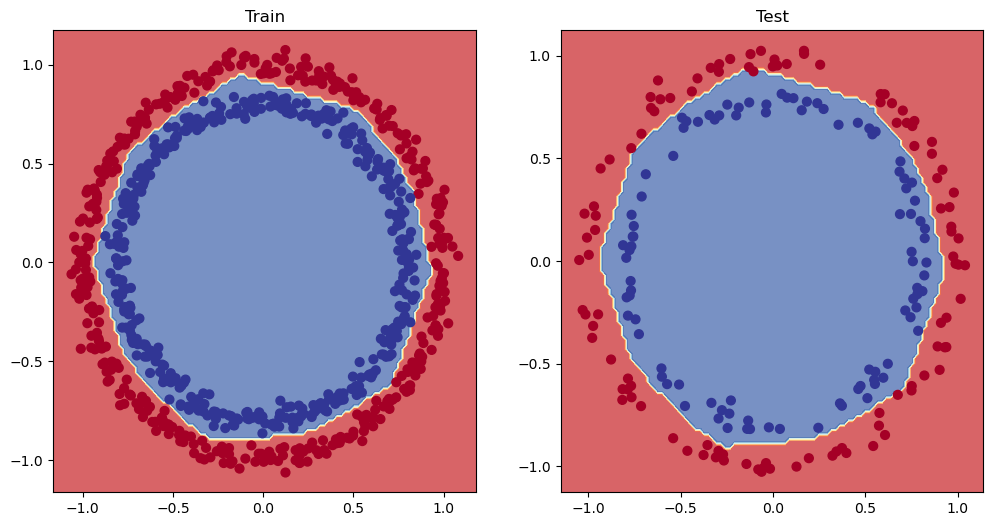

In [46]:
from helper_functions import plot_predictions, plot_decision_boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model3, X_test, y_test)